In [4]:
import numpy as np

In [8]:
n = 5
loc_a = np.array([4,1])
loc_a_ = np.array([0,1])
rew_a = 10
loc_b = np.array([4,3])
loc_b_ = np.array([2,3])
rew_b = 5

In [46]:
class gridworld():
    def __init__(self, n,loc_a, loc_a_, loc_b, loc_b_, rew_a, rew_b) -> None:
        self.n = n
        self.loc_a = loc_a
        self.loc_a_ = loc_a_
        self.loc_b = loc_b
        self.loc_b_ = loc_b_ 
        self.rew_a = rew_a 
        self.rew_b = rew_b
        self.current_rew = 0
        self.current_pos = np.zeros(2)
        self.state_values = np.zeros((n,n))

    def check_pos(self):
        if self.current_pos[0] == self.loc_a[0] and self.current_pos[1] == self.loc_a[1]:
            self.current_rew += self.rew_a
            self.current_pos = self.loc_a_
        elif self.current_pos[0] == self.loc_b[0] and self.current_pos[1] == self.loc_b[1]:
            self.current_rew += self.rew_b
            self.current_pos = self.loc_b_

    def move_north(self):
        if self.current_pos[0] == self.n - 1:
            self.current_rew -= 1
        else:
            self.current_pos += np.array([1,0])
            self.check_pos()
    
    def move_south(self):
        if self.current_pos[0] == 0:
            self.current_rew -= 1
        else:
            self.current_pos += np.array([-1,0])
            self.check_pos()

    def move_east(self):
        if self.current_pos[1] == self.n - 1:
            self.current_rew -= 1
        else:
            self.current_pos += np.array([0,1])
            self.check_pos()

    def move_west(self):
        if self.current_pos[1] == 0:
            self.current_rew -= 1
        else:
            self.current_pos += np.array([0,-1])
            self.check_pos()



In [62]:
grid = gridworld(n,loc_a,loc_a_,loc_b,loc_b_,rew_a,rew_b)

In [34]:
grid_size = 5
initial_state = np.array([0,0])
loc_a = np.array([4,1])
loc_a_ = np.array([0,1])
rew_a = 10
loc_b = np.array([4,3])
loc_b_ = np.array([2,3])
rew_b = 5

In [58]:

def next_state(state, action):
    if state[0] == loc_a[0] and state[1] == loc_a[1]:
                    return loc_a_, rew_a
    elif state[0] == loc_b[0] and state[1] == loc_b[1]:
                    return loc_b_, rew_b
    else:
        if action == 'N':
            if state[0] == grid_size - 1:
                return state, -1
            else:
                state = state + np.array([1,0])
                return state, 0
        if action == 'S':
            if state[0] == 0:
                return state, -1
            else:
                state = state + np.array([-1,0])
                return state, 0
        if action == 'W':
            if state[1] == 0:
                return state, -1
            else:
                state = state + np.array([0,-1])
                return state, 0
        if action == 'E':
            if state[1] == grid_size-1:
                return state, -1
            else:
                state = state + np.array([0,1])
                return state, 0
        


def compute_val_function(max_iterations, eps):
    val_function = np.zeros((max_iterations, grid_size,grid_size))
    change = np.zeros(max_iterations)
    actions = ['N','S','W','E']
    iteration = 0
    gamma = 0.9
    change[0] = 10
    while iteration <= max_iterations:
        for i in range(grid_size):
            for j in range(grid_size):
                value = 0 
                for action in actions:
                    astate, arew = next_state(np.array([i,j]),action)
                    value += 0.25 * (arew + gamma * val_function[iteration,astate[0],astate[1]])
                val_function[iteration+1,i,j] = value
        change[iteration] = abs(np.sum(val_function[iteration]-val_function[iteration+1]))
        if change[iteration] < eps: 
            break
        iteration += 1
    return val_function, iteration, change



In [59]:
grid_size = 5
initial_state = np.array([0,0])
loc_a = np.array([4,1])
loc_a_ = np.array([0,1])
rew_a = 10
loc_b = np.array([4,3])
loc_b_ = np.array([2,3])
rew_b = 5
epsilon = 1*10e-16
max_iterations = 1000000
val_func, iterates, change= compute_val_function(max_iterations, epsilon)
print(val_func[iterates])
print(iterates)

[[-1.85770055 -1.34523126 -1.22926726 -1.42291815 -1.97517905]
 [-0.9735923  -0.43549543 -0.35488227 -0.58560509 -1.18307508]
 [ 0.05082249  0.73817059  0.67311326  0.35818621 -0.40314114]
 [ 1.52158807  2.99231786  2.25013995  1.9075717   0.54740271]
 [ 3.30899634  8.78929186  4.42761918  5.32236759  1.49217876]]
314


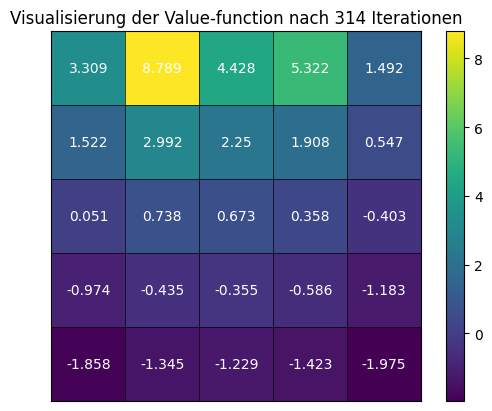

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel einer 5x5-Matrix
matrix = np.round(val_func[iterates],3)

# Erstelle die Grafik
fig, ax = plt.subplots()

# Zeige die Matrix als Bild
cax = ax.imshow(matrix, cmap='viridis', origin='lower')

# Füge Text für jeden Wert in das Raster
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='white')

# Zeige die Farbskala und das Raster
plt.colorbar(cax)
plt.grid(visible=True, color='black', linestyle='-', linewidth=0.5)

# Anpassung der Achsen
ax.set_xticks(np.arange(-0.5, 5, 1))
ax.set_yticks(np.arange(-0.5, 5, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(f"Visualisierung der Value-function nach {iterates} Iterationen")
ax.tick_params(length=0)  # Entfernt die kleinen Ticks auf den Achsen

# Rasterlinien aktivieren
plt.grid(True)
plt.show()


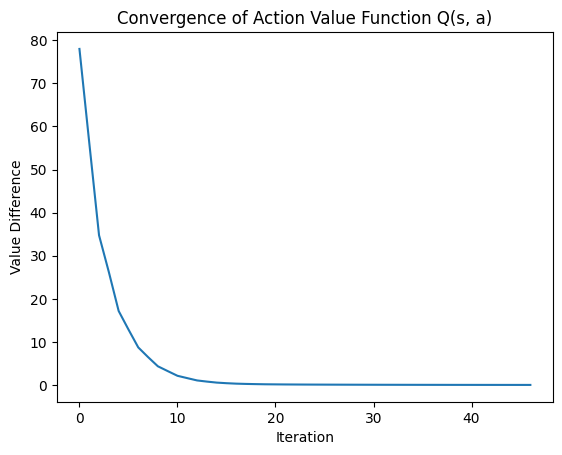

Final Action Value Function Q(s, a):
Q(0, 0) = [1.97890411 1.37023607 7.91116544 1.97890411]
Q(0, 1) = [8.7900937 8.7900937 8.7900937 8.7900937]
Q(0, 2) = [2.98565003 2.02591851 4.79091413 7.91116544]
Q(0, 3) = [5.32315186 5.32315186 5.32315186 5.32315186]
Q(0, 4) = [0.34373822 0.49344029 0.34373822 4.79091413]
Q(1, 0) = [2.97890411 0.04654672 2.69388769 0.37023607]
Q(1, 1) = [7.91116544 0.66515487 2.02591851 1.37023607]
Q(1, 2) = [3.98565003 0.60659477 1.71759804 2.69388769]
Q(1, 3) = [4.79091413 0.32315186 0.49344029 2.02591851]
Q(1, 4) = [ 1.34373822 -0.36204809 -0.50655971  1.71759804]
Q(2, 0) = [ 1.37023607 -0.87542654  0.66515487 -0.95345328]
Q(2, 1) = [ 2.69388769 -0.39114432  0.60659477  0.04654672]
Q(2, 2) = [ 2.02591851 -0.3186006   0.32315186  0.66515487]
Q(2, 3) = [ 1.71759804 -0.52625929 -0.36204809  0.60659477]
Q(2, 4) = [ 0.49344029 -1.06398735 -1.36204809  0.32315186]
Q(3, 0) = [ 0.04654672 -1.67112379 -0.39114432 -1.87542654]
Q(3, 1) = [ 0.66515487 -1.2099063  -0.31860

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Grid-World Setup
grid_size = 5
gamma = 0.9
threshold = 1e-4  # convergence threshold
actions = ['N', 'S', 'E', 'W']
action_prob = 0.25  # probability of each action under random policy

# Initialize rewards and transitions
rewards = np.zeros((grid_size, grid_size))
rewards[0, 1] = 10  # Reward for A to A'
rewards[0, 3] = 5   # Reward for B to B'
special_states = {(0, 1): (4, 1), (0, 3): (2, 3)}  # A -> A' and B -> B'

# Initialize action-value function Q(s, a)
Q = np.zeros((grid_size, grid_size, len(actions)))

# Helper functions to move in the grid
def next_state(state, action):
    i, j = state
    if state in special_states:
        return special_states[state], rewards[i, j]
    if action == 'N':
        return (max(i - 1, 0), j), -1 if i == 0 else 0
    elif action == 'S':
        return (min(i + 1, grid_size - 1), j), -1 if i == grid_size - 1 else 0
    elif action == 'E':
        return (i, min(j + 1, grid_size - 1)), -1 if j == grid_size - 1 else 0
    elif action == 'W':
        return (i, max(j - 1, 0)), -1 if j == 0 else 0

# Iterative Policy Evaluation for Q(s, a)
convergence = []
while True:
    delta = 0
    new_Q = np.copy(Q)
    for i in range(grid_size):
        for j in range(grid_size):
            for action_index, action in enumerate(actions):
                (next_i, next_j), reward = next_state((i, j), action)
                q_value = reward + gamma * np.mean(Q[next_i, next_j, :])  # Average over all actions in next state (random policy)
                new_Q[i, j, action_index] = q_value
                delta = max(delta, abs(Q[i, j, action_index] - new_Q[i, j, action_index]))
    convergence.append(np.sum(np.abs(new_Q - Q)))
    Q = new_Q
    if delta < threshold:
        break

# Visualization of the convergence of the Action Value function
plt.plot(convergence)
plt.xlabel('Iteration')
plt.ylabel('Value Difference')
plt.title('Convergence of Action Value Function Q(s, a)')
plt.show()

# Final Action Value Function Q(s, a)
print("Final Action Value Function Q(s, a):")
for i in range(grid_size):
    for j in range(grid_size):
        print(f"Q({i}, {j}) =", Q[i, j, :])
